In [2]:
# Import our dependencies

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [3]:
%matplotlib inline

In [4]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf



In [6]:
# List of tickers
tickers = ['AMZN', 'MSFT', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
msft_stock = stock_data['MSFT']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"MSFT :{len(msft_stock)},\n AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
MSFT :522,
 AMZN:522,
 VALE:522,
 AAPL:501 


In [22]:
Apple_stock.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953873   
1  2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669968   
2  2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
3  2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
4  2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

      Volume Ticker  
0  104487900   AAPL  
1   99310400   AAPL  
2   94537600   AAPL  
3   96904000   AAPL  
4   86709100   AAPL

In [17]:
#Using the Open Stock Price to be our traing dataset
training_set=Apple_stock.iloc[:,1:2].values

training_set

array([[177.830002],
       [182.630005],
       [179.610001],
       [172.699997],
       [172.889999],
       [169.080002],
       [172.320007],
       [176.119995],
       [175.779999],
       [171.339996],
       [171.509995],
       [170.      ],
       [166.979996],
       [164.419998],
       [160.020004],
       [158.979996],
       [163.5     ],
       [162.449997],
       [165.710007],
       [170.160004],
       [174.009995],
       [174.75    ],
       [174.479996],
       [171.679993],
       [172.860001],
       [171.729996],
       [176.050003],
       [174.139999],
       [172.330002],
       [167.369995],
       [170.970001],
       [171.850006],
       [171.029999],
       [169.820007],
       [164.979996],
       [165.539993],
       [152.580002],
       [163.839996],
       [163.059998],
       [164.699997],
       [164.389999],
       [168.470001],
       [164.490005],
       [163.360001],
       [158.820007],
       [161.479996],
       [160.199997],
       [158.9

In [20]:
#Scalling our Dataset/Normailzing the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.71962225],
       [0.7862797 ],
       [0.74434103],
       [0.64838208],
       [0.65102063],
       [0.59811136],
       [0.64310518],
       [0.69587546],
       [0.69115395],
       [0.6294958 ],
       [0.63185657],
       [0.61088733],
       [0.56894866],
       [0.53339807],
       [0.47229553],
       [0.45785298],
       [0.52062209],
       [0.50604074],
       [0.55131237],
       [0.6131093 ],
       [0.66657397],
       [0.67685039],
       [0.67310086],
       [0.63421733],
       [0.65060405],
       [0.63491172],
       [0.69490348],
       [0.66837933],
       [0.64324398],
       [0.57436456],
       [0.6243577 ],
       [0.63657829],
       [0.62519089],
       [0.60838778],
       [0.54117474],
       [0.54895139],
       [0.36897652],
       [0.5253436 ],
       [0.5145118 ],
       [0.5372864 ],
       [0.53298147],
       [0.5896403 ],
       [0.53437025],
       [0.51867793],
       [0.45563122],
       [0.49257038],
       [0.47479508],
       [0.457

In [39]:
#Setting up our features and target variables

X_train = []
y_train = []


for i in range(60,501):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

    

X_train = np.array(X_train)
y_train = np.array(y_train)

In [40]:
Apple_stock.shape

(501, 8)

In [41]:
print(X_train.shape)
print(y_train.shape)

(441, 60)
(441,)


In [42]:
X_train

array([[0.71962225, 0.7862797 , 0.74434103, ..., 0.66476881, 0.64102201,
        0.70379112],
       [0.7862797 , 0.74434103, 0.64838208, ..., 0.64102201, 0.70379112,
        0.72962088],
       [0.74434103, 0.64838208, 0.65102063, ..., 0.70379112, 0.72962088,
        0.71976104],
       ...,
       [0.62782944, 0.64227179, 0.62602406, ..., 0.97333707, 0.96056088,
        0.93875847],
       [0.64227179, 0.62602406, 0.66351881, ..., 0.96056088, 0.93875847,
        0.92320513],
       [0.62602406, 0.66351881, 0.66365782, ..., 0.93875847, 0.92320513,
        0.94611853]])

In [43]:
y_train

array([0.72962088, 0.71976104, 0.66685177, 0.67435084, 0.71503953,
       0.64366057, 0.62699626, 0.63560611, 0.59297325, 0.58339121,
       0.57464235, 0.61949718, 0.52645459, 0.54173033, 0.59366743,
       0.5957506 , 0.56172759, 0.48757106, 0.50326339, 0.41522012,
       0.46160251, 0.49756968, 0.42632973, 0.44632678, 0.46743501,
       0.52548261, 0.4166087 , 0.40161075, 0.40980421, 0.3817525 ,
       0.23274547, 0.25801963, 0.27135121, 0.31731702, 0.2894043 ,
       0.19261217, 0.18164135, 0.16358826, 0.20552695, 0.17247592,
       0.15803356, 0.26912924, 0.32023336, 0.33175936, 0.30301346,
       0.29009848, 0.29190385, 0.2546869 , 0.31342868, 0.29259824,
       0.19816687, 0.09526445, 0.0988752 , 0.1149839 , 0.08429385,
       0.05638113, 0.10290232, 0.12192738, 0.1501181 , 0.19288976,
       0.23177329, 0.22385783, 0.15900576, 0.1560894 , 0.13928608,
       0.16331067, 0.21302602, 0.23996654, 0.26732388, 0.27301757,
       0.27426736, 0.23580062, 0.25093736, 0.33009299, 0.34342

In [46]:
#Reshaping the dataset
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(441, 60, 1)

In [47]:
regressor = Sequential()
regressor

In [48]:
# Adding Layers into the model 

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [49]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100

14/14 [==============================] - 15s 87ms/step - loss: 0.0939
Epoch 2/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0287
Epoch 3/100
14/14 [==============================] - 1s 82ms/step - loss: 0.0231
Epoch 4/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0194
Epoch 5/100
14/14 [==============================] - 1s 80ms/step - loss: 0.0201
Epoch 6/100
14/14 [==============================] - 1s 74ms/step - loss: 0.0182
Epoch 7/100
14/14 [==============================] - 1s 84ms/step - loss: 0.0183
Epoch 8/100
14/14 [==============================] - 1s 84ms/step - loss: 0.0159
Epoch 9/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0161
Epoch 10/100
14/14 [==============================] - 1s 76ms/step - loss: 0.0149
Epoch 11/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0130
Epoch 12/100
14/14 [==============================] - 1s 75ms/step - loss: 0.0129
Epoch 13/100
14/14 [==

14/14 [==============================] - 1s 69ms/step - loss: 0.0058
Epoch 97/100
14/14 [==============================] - 1s 66ms/step - loss: 0.0045
Epoch 98/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0048
Epoch 99/100
14/14 [==============================] - 1s 65ms/step - loss: 0.0056
Epoch 100/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0048


In [52]:
# Loading the Stock Prices for Jan-2024
AAPL_ticker_test = Path("../Resources/AAPL_Test.csv")
AAPL_stock_Test = pd.read_csv(AAPL_ticker_test)
AAPL_stock_Test["Ticker"]= "AAPL_Test"  

AAPL_stock_Test.head()

Date        Open        High         Low       Close   Adj Close  \
0  2024-01-02  187.149994  188.440002  183.889999  185.639999  185.639999   
1  2024-01-03  184.220001  185.880005  183.429993  184.250000  184.250000   
2  2024-01-04  182.149994  183.089996  180.880005  181.910004  181.910004   
3  2024-01-05  181.990005  182.759995  180.169998  181.179993  181.179993   
4  2024-01-08  182.089996  185.600006  181.500000  185.559998  185.559998   

     Volume     Ticker  
0  82488700  AAPL_Test  
1  58414500  AAPL_Test  
2  71983600  AAPL_Test  
3  62303300  AAPL_Test  
4  59144500  AAPL_Test

In [73]:
AAPL_stock_Test.iloc.[1:60,0].values

SyntaxError: invalid syntax (3045746891.py, line 1)

In [66]:
#Extracting our 2024 Data for open price
actual_stock_price = AAPL_stock_Test.iloc[:,1:2].values
actual_stock_price
actual_stock_price.shape

(21, 1)

In [65]:
#Preping our Data
dataset_total=pd.concat((Apple_stock['Open'],AAPL_stock_Test['Open']),axis  =0)
inputs=dataset_total[len(dataset_total)-len(AAPL_stock_Test)-60:].values


inputs = inputs.reshape(-1,1)
inputs= scaler.transform(inputs)


X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test

array([[[0.66351881],
        [0.66365782],
        [0.7054575 ],
        ...,
        [0.92320513],
        [0.94611853],
        [0.94278559]],

       [[0.66365782],
        [0.7054575 ],
        [0.72337179],
        ...,
        [0.94611853],
        [0.94278559],
        [0.84904861]],

       [[0.7054575 ],
        [0.72337179],
        [0.72476036],
        ...,
        [0.94278559],
        [0.84904861],
        [0.80835991]],

       ...,

       [[0.59727817],
        [0.60186089],
        [0.62477429],
        ...,
        [0.95833912],
        [0.96389382],
        [0.96111647]],

       [[0.60186089],
        [0.62477429],
        [0.68754341],
        ...,
        [0.96389382],
        [0.96111647],
        [0.9479239 ]],

       [[0.62477429],
        [0.68754341],
        [0.66976811],
        ...,
        [0.96111647],
        [0.9479239 ],
        [0.91653925]]])

In [69]:
inputs.shape

(81, 1)

In [74]:
#Predicting the Values for Jan 2024
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 3s 3s/step


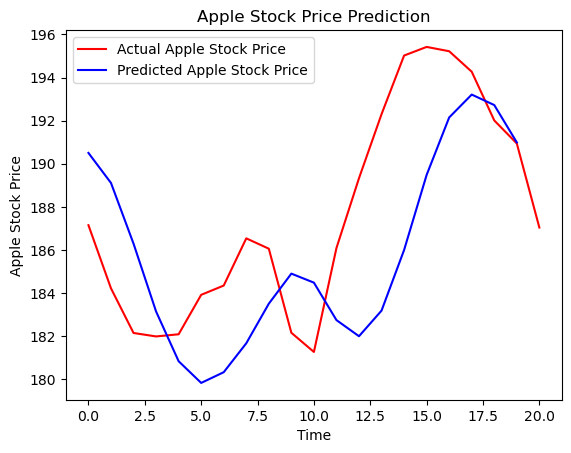

In [76]:
#Plotting the Data

plt.plot(actual_stock_price, color ='red', label ="Actual Apple Stock Price")
plt.plot(predicted_stock_price, color ='blue', label ="Predicted Apple Stock Price")
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()

In [78]:
predicted_stock_price, actual_stock_price

(array([[190.50243],
        [189.10861],
        [186.29291],
        [183.14645],
        [180.84041],
        [179.83354],
        [180.33026],
        [181.67207],
        [183.5088 ],
        [184.9037 ],
        [184.48512],
        [182.74768],
        [181.99976],
        [183.18779],
        [185.99869],
        [189.48164],
        [192.14758],
        [193.20967],
        [192.72302],
        [190.99089]], dtype=float32),
 array([[187.149994],
        [184.220001],
        [182.149994],
        [181.990005],
        [182.089996],
        [183.919998],
        [184.350006],
        [186.539993],
        [186.059998],
        [182.160004],
        [181.270004],
        [186.089996],
        [189.330002],
        [192.300003],
        [195.020004],
        [195.419998],
        [195.220001],
        [194.270004],
        [192.009995],
        [190.940002],
        [187.039993]]))

In [70]:
Apple_stock["High"]

0      182.880005
1      182.940002
2      180.169998
3      175.300003
4      174.139999
          ...    
496    195.410004
497    193.889999
498    193.500000
499    194.660004
500    194.399994
Name: High, Length: 501, dtype: float64

In [71]:
Apple_stock.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953873   
1  2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669968   
2  2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
3  2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
4  2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

      Volume Ticker  
0  104487900   AAPL  
1   99310400   AAPL  
2   94537600   AAPL  
3   96904000   AAPL  
4   86709100   AAPL

<Axes: xlabel='Date'>

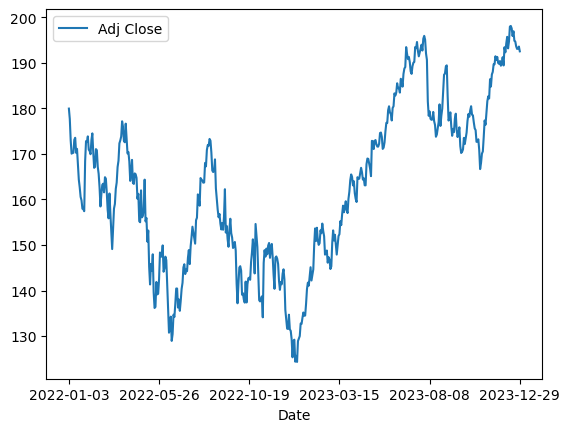

In [72]:
Apple_stock.plot(x='Date', y='Adj Close', kind='line')

In [101]:
# Assigning our Features
# features_AAPL= pd.DataFrame({"Open": Apple_stock["Open"] , 
#                         "High":Apple_stock["High"]})

features_AAPL= pd.DataFrame({"Open": Apple_stock["Open"]  
                        })
features_AAPL

Open
0    177.830002
1    182.630005
2    179.610001
3    172.699997
4    172.889999
..          ...
496  195.179993
497  193.610001
498  192.490005
499  194.139999
500  193.899994

[501 rows x 1 columns]

In [102]:
y_AAPL= pd.DataFrame({"Adj Close": Apple_stock["Adj Close"]})
y_AAPL

Adj Close
0    179.953873
1    177.669968
2    172.943985
3    170.056976
4    170.225037
..          ...
496  193.600006
497  193.050003
498  193.149994
499  193.580002
500  192.529999

[501 rows x 1 columns]

In [103]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

In [104]:
features_scaled_AAPL= scaler.fit_transform(features_AAPL)
features_scaled_AAPL

array([[0.71962225],
       [0.7862797 ],
       [0.74434103],
       [0.64838208],
       [0.65102063],
       [0.59811136],
       [0.64310518],
       [0.69587546],
       [0.69115395],
       [0.6294958 ],
       [0.63185657],
       [0.61088733],
       [0.56894866],
       [0.53339807],
       [0.47229553],
       [0.45785298],
       [0.52062209],
       [0.50604074],
       [0.55131237],
       [0.6131093 ],
       [0.66657397],
       [0.67685039],
       [0.67310086],
       [0.63421733],
       [0.65060405],
       [0.63491172],
       [0.69490348],
       [0.66837933],
       [0.64324398],
       [0.57436456],
       [0.6243577 ],
       [0.63657829],
       [0.62519089],
       [0.60838778],
       [0.54117474],
       [0.54895139],
       [0.36897652],
       [0.5253436 ],
       [0.5145118 ],
       [0.5372864 ],
       [0.53298147],
       [0.5896403 ],
       [0.53437025],
       [0.51867793],
       [0.45563122],
       [0.49257038],
       [0.47479508],
       [0.457

In [105]:
#Incorprating Time stamps into the model

X_train = []
y_train = []

for i in range(60, 501):
    X_train.append(features_scaled_AAPL[i-60:i, 0])
    y_train.append(features_scaled_AAPL[i, 0])
    
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [106]:
#Initilizating the LSTM Model

model = Sequential()
model

In [107]:
# Adding Layers into the model 

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))

model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
14/14 [==============================] - 11s 68ms/step - loss: 0.1251
Epoch 2/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0371
Epoch 3/100
14/14 [==============================] - 1s 71ms/step - loss: 0.0225
Epoch 4/100
14/14 [==============================] - 1s 69ms/step - loss: 0.0199
Epoch 5/100
14/14 [==============================] - 1s 66ms/step - loss: 0.0195
Epoch 6/100
14/14 [==============================] - 1s 66ms/step - loss: 0.0180
Epoch 7/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0168
Epoch 8/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0145
Epoch 9/100
14/14 [==============================] - 1s 66ms/step - loss: 0.0133
Epoch 10/100
14/14 [==============================] - 1s 70ms/step - loss: 0.0148
Epoch 11/100
14/14 [==============================] - 1s 79ms/step - loss: 0.0145
Epoch 12/100
14/14 [==============================] - 1s 71ms/step - loss: 0.0137
Epoch 13/100
14/14 [====

In [108]:
# File to Load 
AAPL_ticker_test = Path("../Resources/AAPL_Test.csv")
AAPL_stock_Test = pd.read_csv(AAPL_ticker_test)
AAPL_stock_Test["Ticker"]= "AAPL_Test"  


# features_AAPL_test= pd.DataFrame({"Open": AAPL_stock_Test["Open"] , 
#                         "High":AAPL_stock_Test["High"]})

features_AAPL_test= pd.DataFrame({"Open": AAPL_stock_Test["Open"]
                       })
features_AAPL_test

Open
0   187.149994
1   184.220001
2   182.149994
3   181.990005
4   182.089996
5   183.919998
6   184.350006
7   186.539993
8   186.059998
9   182.160004
10  181.270004
11  186.089996
12  189.330002
13  192.300003
14  195.020004
15  195.419998
16  195.220001
17  194.270004
18  192.009995
19  190.940002
20  187.039993

In [109]:
features_AAPL_test['Open']

0     187.149994
1     184.220001
2     182.149994
3     181.990005
4     182.089996
5     183.919998
6     184.350006
7     186.539993
8     186.059998
9     182.160004
10    181.270004
11    186.089996
12    189.330002
13    192.300003
14    195.020004
15    195.419998
16    195.220001
17    194.270004
18    192.009995
19    190.940002
20    187.039993
Name: Open, dtype: float64

In [124]:
dataset_total = pd.concat((features_AAPL_test['Open'], features_AAPL['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(features_AAPL_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs


X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,])
    X_test = np.array(X_test)
    
    
    X_test = np.reshape(X_test, (X_test.shape[0]))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

D:\Anacondda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: cannot reshape array of size 60 into shape (1,)